### Develop a classification model for titanic survival prediction.
1. Download the data from [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data) and perform the following operations.
2. EDA (Univariate, Multivariate, KDE, Pearson Correlation)
3.  Data Preprocessing (Imputation, create at least 2 new features)
4.  Cross-validation
5.  Use ROC curve, Precision/Recall for the model's metric (NOT ALLOWED TO USE ACCURACY)
6.  An inference pipeline consisting of Data Preprocessing and prediction.
7. Note: It is mandatory to plot each graph and write an observation about it. Plot without title, x-label and y-label won't be accepted. 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv(r'E:\Study\FSDS 16 03\LU_Mentoring_Sessions\Projects\002 Titanic Dataset\titanic\train.csv')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.shape

(891, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Primary analysis:
### We have total 11 features in the dataset
    Survived is our target feature wich is categorical in nature
    passengerId is just a number given to the passanger on board and will not add effect in prediction hence it can be neglected at later stage
    Pclass is categorical data
    Name is a string data which canot be categorised hence, and will not affetc prediction hence can be neglected
    Sex is categorical
    Age is numerical
    SibSp is numerical
    Parch is numberical
    Ticket is combination of string and number, not an important feature
    Fare is numerical data
    Cabin also not important
    Embarked is categorical data

## Lets check if there are any duplicate entries

In [55]:
df.duplicated().sum()

0

### There are no duplicat entries in the dataset

## Lets us now check for the null values

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##  We can see that there are null values in "Age" and "Cabin" 
### lets check it graphical representation for the same

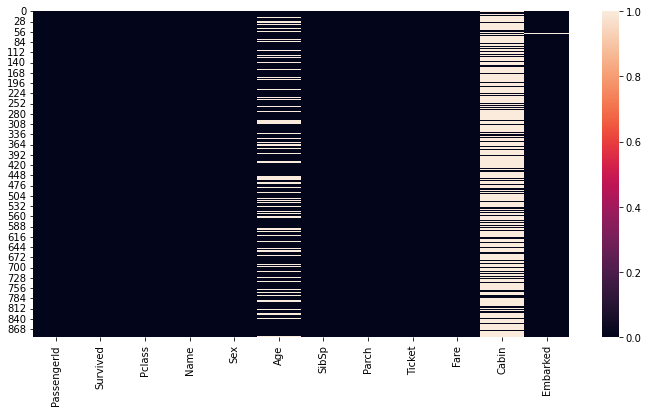

In [94]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

#### Observation : 
    There are considerable amount of null values in the categories Age and Cabin that must be taken care of 

# Univariate/ Multivariate Data Analysis

## Visualising of Data 

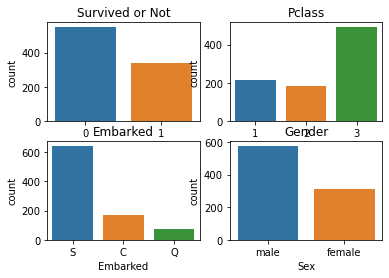

In [101]:
fig, axes = plt.subplots(2,2)

sns.countplot(df['Survived'], ax = axes[0,0]).set_title('Survived or Not')

sns.countplot(df['Pclass'], ax = axes[0,1]).set_title('Pclass')

sns.countplot(df['Embarked'], ax = axes[1,0]).set_title('Embarked')

sns.countplot(df['Sex'], ax = axes[1,1]).set_title('Gender')

plt.show()

#### Observation :  
    survivour count is less compared to not survived
    The are comaratively more people in the Pclass 3
    The are more people in S Embarked category
    Number of male passsenger is comparatively more than the female passenger

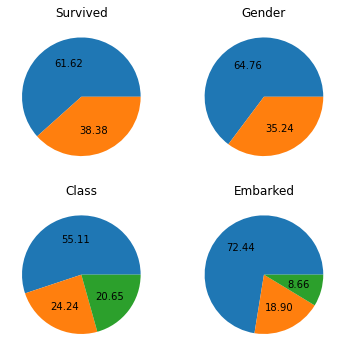

In [123]:
plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.pie(df['Survived'].value_counts(), autopct='%.2f')
plt.title('Survived')

plt.subplot(2,2,2)
plt.pie(df['Sex'].value_counts(), autopct='%.2f')
plt.title('Gender')

plt.subplot(2,2,3)
plt.pie(df['Pclass'].value_counts(), autopct='%.2f')
plt.title('Class')

plt.subplot(2,2,4)
plt.pie(df['Embarked'].value_counts(), autopct='%.2f')
plt.title('Embarked')


plt.show()

#### Observation :  
    around 62% people falied to survive
    around 65% male passenger were on the ship
    55% people in class 3, 25% in class 2 and 20% people in class 1 
    72% people are marked Embarked S, 19% marked as C and 9% marked Q 

### Age (Histogram, Distribution and Boxplot)

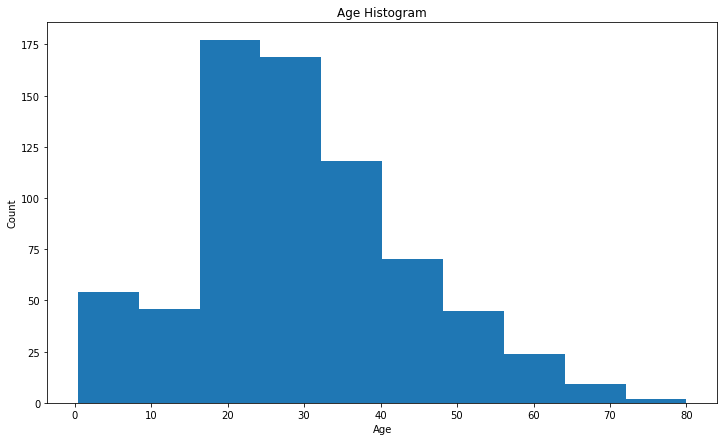

In [116]:
plt.figure(figsize=(12,7))
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(df['Age'])
plt.show()

#### Observation :  
    most of the passenger are of age 20 to 40

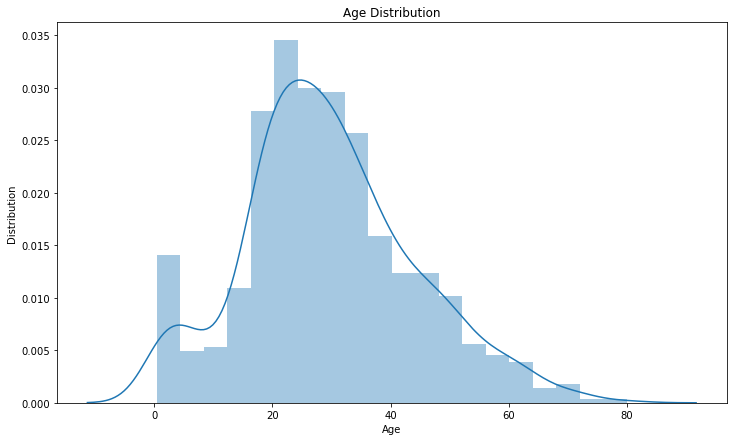

In [117]:
plt.figure(figsize=(12,7))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Distribution')
sns.distplot(df['Age'])
plt.show()

#### Observation :  
    Age distribution is right skewd

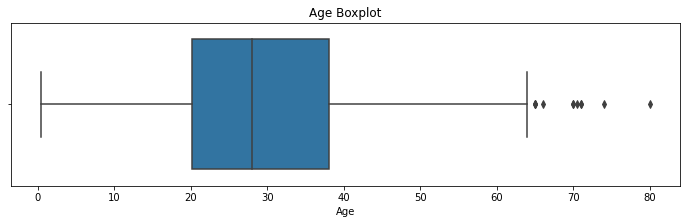

In [118]:
plt.figure(figsize=(12,3))
plt.title('Age Boxplot')
plt.xlabel('Age')
sns.boxplot(df['Age'])
plt.show()

#### Observation :  
    Considerable outlier are present in the dataset

### Fare (Histogram, Distribution and Boxplot)

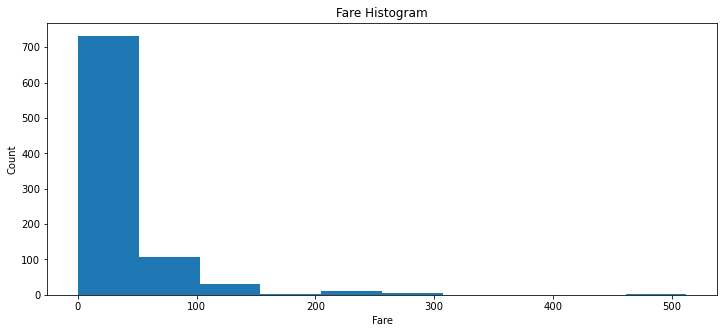

In [122]:
plt.figure(figsize=(12,5))
plt.title('Fare Histogram')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.hist(df['Fare'])
plt.show()

#### Observation :  
    Most of the passenger are paying in the range 0 to 100

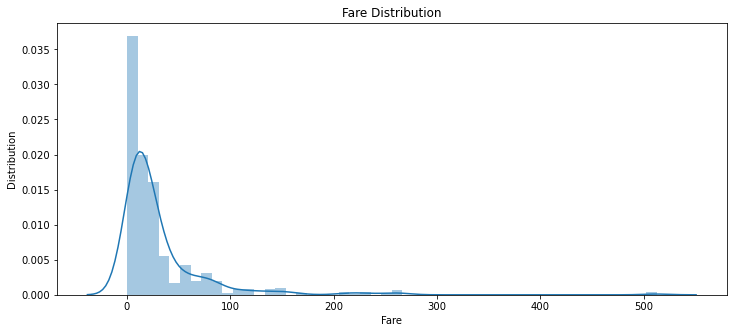

In [120]:
plt.figure(figsize=(12,5))
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Distribution')
sns.distplot(df['Fare'])
plt.show()

#### Observation :  
    Fare distribution is right skewd

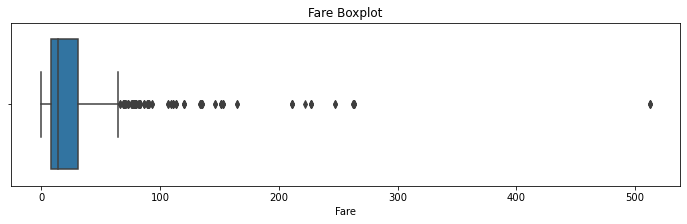

In [121]:
plt.figure(figsize=(12,3))
plt.title('Fare Boxplot')
plt.xlabel('Fare')
sns.boxplot(df['Fare'])
plt.show()

#### Observation :  
    Extreame outlier are present in the dataset 

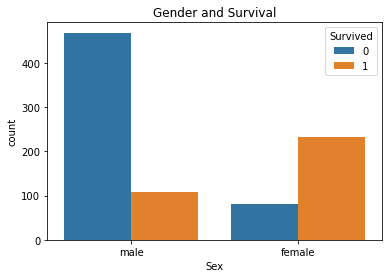

In [146]:
sns.countplot('Sex', hue = 'Survived', data = df)
plt.title('Gender and Survival')
plt.show()

#### Observation :  
    There are more Female Survivours than the male

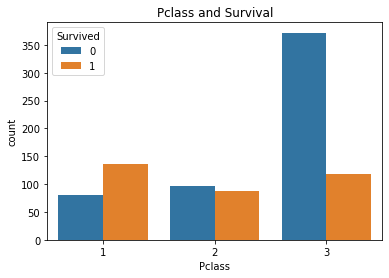

In [147]:
sns.countplot('Pclass', hue = 'Survived', data = df)
plt.title('Pclass and Survival')
plt.show()

#### Observation :  
    Pclass 3 less number of surviours
    Pclass 2 almost same number of survivours
    Pclass 1 More survivours than othe Pclass
    